# Predicting Telecommunications Consumer Churn Using Machine Learning


Jupyter Notebook by Nicholas Ford

This Jupyter Notebook uses Python machine learning and data analytics libaries to construct a machine learning model capable of predicting consumer churn in the telecommunications sector.


# Problem Statement



> Given account and demographic information about a telecommunications consumer, can churn likelihood be predicted?


# Project Data

The source of this project's data is provided by IBM, classified as a fictional telecommunications company that provided wireline services to 7043 California customers in the third quarter of 2019:

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

This dataset was obtained on Kaggle:

https://www.kaggle.com/blastchar/telco-customer-churn


# Success Criteria


> This initiative will be deemed successful if consumer churn can be predicted at or above 75% accuracy.


# Features

Information on the customer attributes can be found in the data dictionary below.

**Data Dictionary**

* CustomerID: A unique ID that identifies each customer
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicates if the customer is married: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No
* Tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection: Indicates if the customer subscribes to an additional Internet equipment device protection plan provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above
* Churn: Indicates if the customer left the company this quarter: Yes, No

## Exploratory Data Analysis Tools

Pandas, NumPy, and Matplotlib will be used for conducting this analysis.

In [1]:
# Imports for Exploratory Data Analysis and Plotting Tools and Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from adjustText import adjust_text
import logging

# Create log file for debugging and test
logging.basicConfig(filename='logfile.log', level=logging.INFO)
logging.info('Logs printing successfully')

# Allows notebook plot display
%matplotlib inline

# Imports for Classification Models through Scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Imports for Evaluations of Models through Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Load in Data

In [2]:
churn_df = pd.read_csv("TelecomCustomerChurnDataset.csv")
churn_df.shape # (Records, Features)

(7043, 21)

## Conducting Exploratory Data Analysis and Feature Selection

Objectives: 
1. Learn about the data to better understand the dataset that will support the project.
2. Clean the dataset.

Tasks:
1. Determine what types of data we have (numerical or categorical) and how they should be evaluated.
2. Determine if any records have missing values and how those records should be handled.
3. Determine if any features should be transformed or eliminated to make the project successful.

In [3]:
# Sample of first 10 customer records

churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# How many customers left the company in the last quarter?

churn_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:>

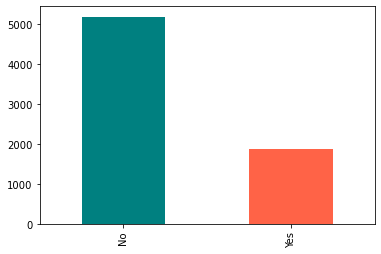

In [5]:
churn_df["Churn"].value_counts().plot(kind="bar", figsize=(6,4), color=["teal", "tomato"])

In [6]:
# Determine what types of data we have (Task 1)(Objective 1)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# TotalCharges column should be converted to a float type

churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Do we have any records with missing values? (Task 2)(Objective 2)

churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Learn about data to determine if any features should be transformed or removed (Task 3)(Objective 1)

## Relation Between Churn and Gender

In [10]:
# Inspect counts of each gender

churn_df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
# Compare gender with churn to see if there is a significant difference

pd.crosstab(churn_df.Churn, churn_df.gender)

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


Text(0, 0.5, 'Number of Customers')

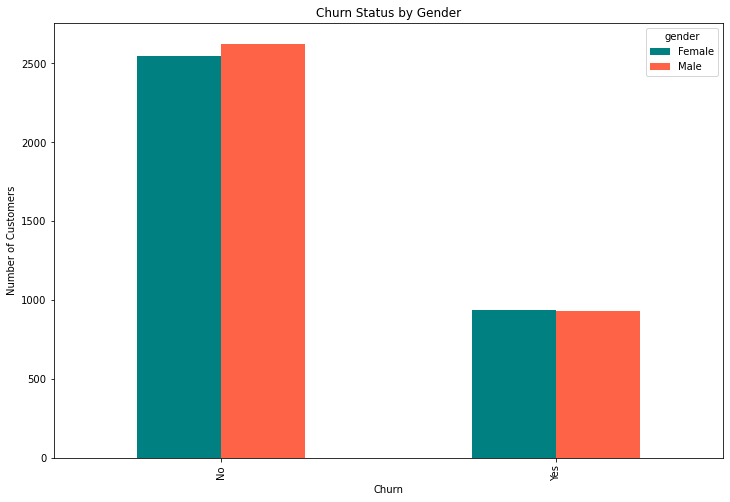

In [12]:
# Visualize the results

pd.crosstab(churn_df.Churn, churn_df.gender).plot(kind="bar", figsize=(12,8), color=["teal", "tomato"])

plt.title("Churn Status by Gender")
plt.ylabel("Number of Customers")

In [13]:
# The visualization above indicates there is very little correlation between gender and consumer churn.

## Tenure vs. Total Charges on Churn

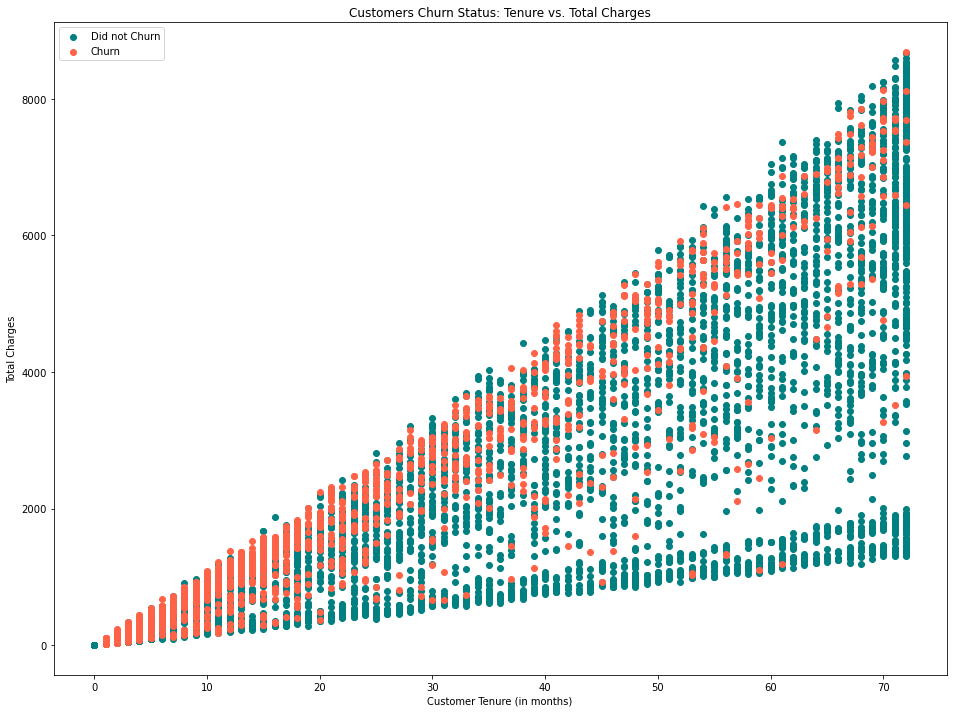

In [14]:
#Plotting Customer Tenure against Monthly Charges

plt.figure(figsize=(16, 12))

plt.scatter(churn_df.tenure[churn_df.Churn=="No"], churn_df.TotalCharges[churn_df.Churn=="No"], color=["teal"])
plt.scatter(churn_df.tenure[churn_df.Churn=="Yes"], churn_df.TotalCharges[churn_df.Churn=="Yes"], color=["tomato"])
plt.title("Customers Churn Status: Tenure vs. Total Charges")
plt.ylabel("Total Charges")
plt.xlabel("Customer Tenure (in months)")
plt.legend(["Did not Churn", "Churn"])

The scatterplot above shows customers most often churned if they were on the higher end of total change
over the course of their tenure

## Internet Type vs. Churn

In [15]:
pd.crosstab(churn_df.InternetService, churn_df.Churn)

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


Text(0.5, 0, 'Number of Customers')

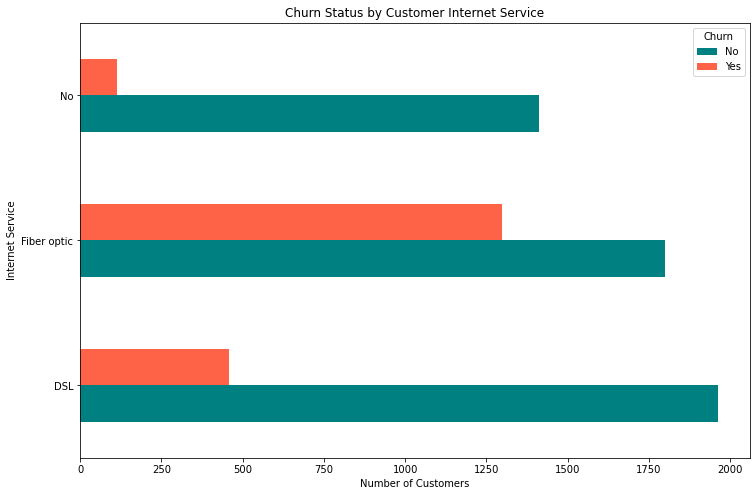

In [16]:
pd.crosstab(churn_df.InternetService, churn_df.Churn).plot(kind="barh", figsize=(12,8), color=["teal", "tomato"])

plt.title("Churn Status by Customer Internet Service")
plt.ylabel("Internet Service")
plt.xlabel("Number of Customers")

The above visualization shows customers are much more likely to churn if they are subscribed
to a fiber optic internet service.

## Relation Between Payment Method, Monthly Charges, and Churn

In [17]:
# Check payment 

churn_df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Text(0.5, 0, 'Payment Method')

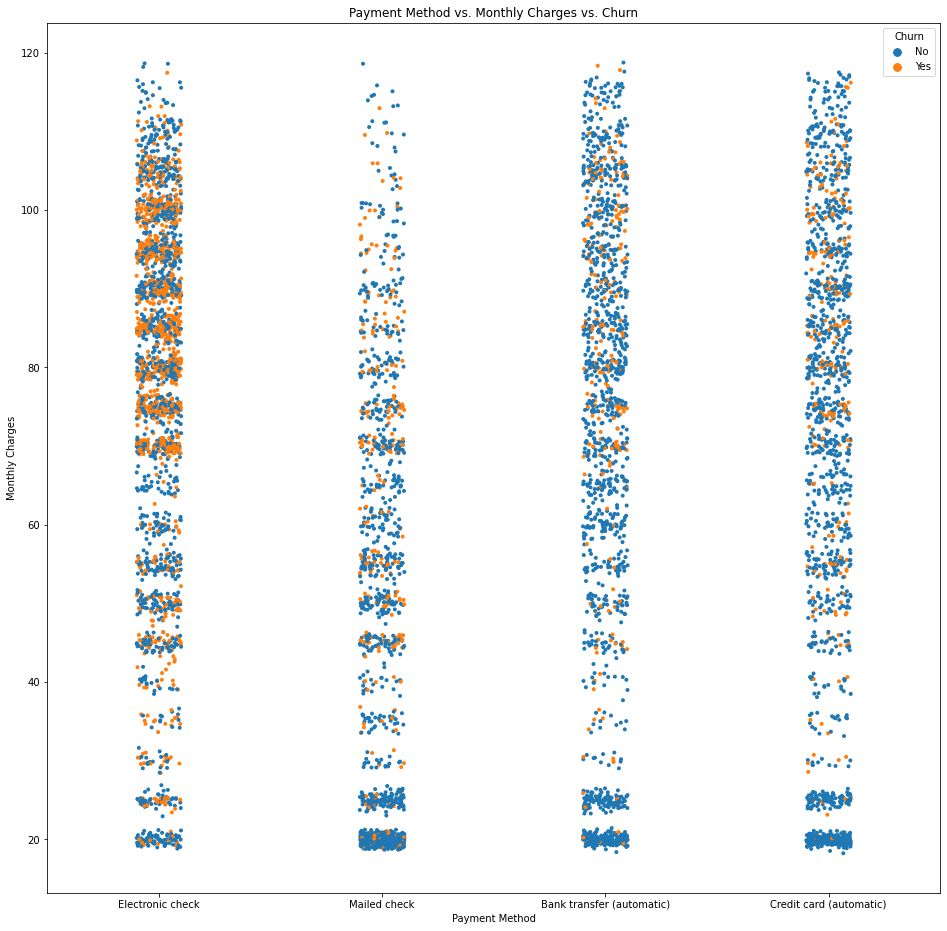

In [18]:
# Create strip plot to visualization 

plt.figure(figsize=(16, 16))
sns.stripplot(x="PaymentMethod", y="MonthlyCharges", hue="Churn", size = 4, data=churn_df)
plt.title("Payment Method vs. Monthly Charges vs. Churn")
plt.ylabel("Monthly Charges")
plt.xlabel("Payment Method")

The above visualization shows a greater density of customers churning when paying between 70-100 dollars per month 
by electronic check.

## Multiple Correspondence Analysis (MCA)(Descriptive Method)

In [19]:
# Creating a second dataframe instance as to not interfere with the instance for machine learning

MCA_df = churn_df.copy()

# Discretize MonthlyCharges and tenure and drop old or redundant features

MonthlyCharges_bin = [0, 38.26, 58.26, 78.26, 98.26, np.inf]
MonthlyCharges_names = ['<$38.25', '$38.26-58.25', '$58.26-78.25', '$78.26-98.25', '$98.26+']
tenure_bin = [0, 16, 31, 46, 51, 66, np.inf]
tenure_names = ['<15m', '16-30m', '31-45m', '46-50m', '51-65m', '66m+']

MCA_df['MonthlyChargesRange'] = pd.cut(MCA_df['MonthlyCharges'], MonthlyCharges_bin, labels=MonthlyCharges_names)
MCA_df['TenureRange'] = pd.cut(MCA_df['tenure'], tenure_bin, labels=tenure_names)

MCA_df.drop(['MonthlyCharges', 'tenure', 'TotalCharges', 'customerID'], axis=1, inplace=True)

MCA_df.to_csv('CleanedTelcoData.csv', index = False)

In [ ]:
## Creating MCA model object

mca_model = prince.MCA(
     check_input=True,
     copy=True,
     n_components=2,
     n_iter=10,
     engine='auto',
     random_state=15)

## Fit the dataframe to the MCA model object

mca_model = mca_model.fit(MCA_df)

## Set figure visuals and plot
plt.figure()

mcafig = mca_model.plot_coordinates(MCA_df,
                     figsize=(20, 20),
                     show_row_points=False,
                     show_row_labels=False,
                     show_column_points=True,
                     column_points_size=175,
                     show_column_labels=False,
                     legend_n_cols=1)

# Override the column labels to add arrows and other parameters for readability

xy_coords=mca_model.column_coordinates(MCA_df).to_dict()
x_coords=xy_coords[0]
y_coords=xy_coords[1]
global_xcoords ={ k : x_coords.get(k,0) for k in set(x_coords)}
global_ycoords ={ k : y_coords.get(k,0) for k in set(y_coords)}

fig = mcafig.get_figure()
labels=[plt.text(global_xcoords[x],global_ycoords[x],x,fontsize=16) for x in global_xcoords.keys()]
adjust_text(labels,arrowprops=dict(arrowstyle='-', color='teal'))

The feature map above is a visualization of the relationships between all features in the telecommunications 
customer dataset. The features closest to the origin (0.0, 0.0) indicate minimal weight on the customer's churn
outcome. In this case it can be seen that both gender categories "hug" the origin and therefore don't impact
churn as much as other features would (as also determined above). Features near each other are also considered
correlated. For example, not streaming movies is closely correlated with churn and having fiber optic internet
service is closely related with a monthly bill between 78.26-98.25 dollars. Similarly, features very far from
each other indicate a potential negative correlation such as positive churn and being on a two year contract.

## Transforming or Removing Features

Through the exploratory data analysis process, all inspected features pointed to some form of correlation
with the output, "Churn", besides "Gender". To improve model accuracy, the gender feature will be removed below.
The customerID field will also be removes as it bears no significance on the outcome and may mmake the model
less accurate. The TotalCharges field will also be removed since it serves only as an amalgam of the monthly
charges and tenure fields which we already include.

In [ ]:
clean_churn_df = churn_df.drop(['gender', 'customerID', 'TotalCharges'], axis=1)

# Test feature removal

clean_churn_df.head()

## Logistic Regression and Random Forest Fitting (Predictive Methods)

In [ ]:
# Splitting the data by input/output

input_df = clean_churn_df.drop("Churn", axis=1)
output_df = clean_churn_df["Churn"]

In [ ]:
# Checking new dataframes

input_df

In [ ]:
output_df

In [ ]:
# Adding all of the categorical features to a list

categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Creating dummy continuous values for all of the categorical data

input_df = pd.get_dummies(input_df, columns=categorical_features, drop_first=True)

In [ ]:
# Separating the data into training (80% of data) and testing (20% of data) sets

np.random.seed(15)

input_df_train, input_df_test, output_df_train, output_df_test = train_test_split(input_df, output_df, test_size=0.2)

In [ ]:
# The logistic regression and random forest models will be tested for score and fit

classification_models = {"Logistic Regression": LogisticRegression(max_iter=1000),
                        "Random Forest": RandomForestClassifier()}

# Function that will be used to score the logisitic regression and random forest models

def score_models(classification_models, input_df_train, input_df_test, output_df_train, output_df_test):
    
    # Using same random seed from data separation
    np.random.seed(15)
    # Dictionary used to hold the scores for the LR and RF models
    model_scores = {}
    
    # Loop for iteration of models, fitting data and evaluating scores, and returning score dictionary
    for name, model in classification_models.items():
        model.fit(input_df_train, output_df_train)
        model_scores[name] = model.score(input_df_test, output_df_test)
    return model_scores
    

In [ ]:
model_scores = score_models(classification_models=classification_models, 
                            input_df_train=input_df_train, 
                            input_df_test=input_df_test, 
                            output_df_train=output_df_train, 
                            output_df_test=output_df_test)

model_scores

## Results

The scores above show the Logistic Regression model predicted churn in the testing dataset with
80.3% accuracy. The Random Forest model predicted churn in the testing dataset with 78.4% accuracy.
Both models achieved the objective of reaching 75% churn prediction accuracy, and Logistic Regression
is confirmed as the best fitting model.